In [2]:
install.packages("ggplot2")
install.packages("patchwork")
install.packages("reshape2")
install.packages("ggpubr")
install.packages("DT")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(Seurat)
library(DT)
library(ggplot2)
library(patchwork)
library(reshape2)


Attaching package: ‘DT’


The following object is masked from ‘package:SeuratObject’:

    JS


The following object is masked from ‘package:Seurat’:

    JS




In [4]:
stringsAsFactors = FALSE

In [13]:
fdir <- "/data2/ZenNa/mice_count_data"


In [21]:
(dir.files <- list.files(pattern="*.tsv", path=fdir)) 
(dir.list <- paste0(fdir, "/", dir.files))

[1] "GSM5661621_D-1.counts.tsv" "GSM5661622_D-3.counts.tsv"
[3] "GSM5661623_D-5.counts.tsv" "GSM5661624_D-7.counts.tsv"
[5] "GSM5661625_W-1.counts.tsv" "GSM5661626_W-3.counts.tsv"
[7] "GSM5661627_W-5.counts.tsv" "GSM5661628_W-7.counts.tsv"

[1] "/data2/ZenNa/mice_count_data/GSM5661621_D-1.counts.tsv"
[2] "/data2/ZenNa/mice_count_data/GSM5661622_D-3.counts.tsv"
[3] "/data2/ZenNa/mice_count_data/GSM5661623_D-5.counts.tsv"
[4] "/data2/ZenNa/mice_count_data/GSM5661624_D-7.counts.tsv"
[5] "/data2/ZenNa/mice_count_data/GSM5661625_W-1.counts.tsv"
[6] "/data2/ZenNa/mice_count_data/GSM5661626_W-3.counts.tsv"
[7] "/data2/ZenNa/mice_count_data/GSM5661627_W-5.counts.tsv"
[8] "/data2/ZenNa/mice_count_data/GSM5661628_W-7.counts.tsv"

In [22]:
mice.files <- lapply(dir.list,read.table)

In [23]:
length(mice.files)

[1] 8

In [24]:
names(mice.files) <- sub("\\D-1.counts.txt", "", dir.files) 
names(mice.files)

[1] "GSM5661621_D-1.counts.tsv" "GSM5661622_D-3.counts.tsv"
[3] "GSM5661623_D-5.counts.tsv" "GSM5661624_D-7.counts.tsv"
[5] "GSM5661625_W-1.counts.tsv" "GSM5661626_W-3.counts.tsv"
[7] "GSM5661627_W-5.counts.tsv" "GSM5661628_W-7.counts.tsv"

In [27]:
d1 <- read.table("/data2/ZenNa/mice_count_data/GSM5661621_D-1.counts.tsv", header=T,row.names = 1)


In [28]:
d1[1:5, 1:5]

C1 C2 C3 C4 C5
0610005C13Rik 0  0  0  0  0 
0610009B22Rik 0  0  0  0  0 
0610009O20Rik 0  0  0  0  0 
0610010F05Rik 0  0  0  0  1 
0610010K14Rik 0  0  0  0  0

In [29]:
d1.obj <- CreateSeuratObject(counts = d1, project = "d1")
d1.obj

An object of class Seurat 
16720 features across 5256 samples within 1 assay 
Active assay: RNA (16720 features, 0 variable features)

In [30]:
d1.obj@assays$RNA@data[1:10, 1:10]

  [[ suppressing 10 column names ‘C1’, ‘C2’, ‘C3’ ... ]]



10 x 10 sparse Matrix of class "dgCMatrix"
                                 
0610005C13Rik . . . . . . . . . .
0610009B22Rik . . . . . . . . . .
0610009O20Rik . . . . . . . . . .
0610010F05Rik . . . . 1 . . . . .
0610010K14Rik . . . . . . . . . .
0610012G03Rik . . 1 . . . . . . .
0610030E20Rik . . . . . . . . . .
0610037L13Rik . . . . . . . 3 . .
0610038B21Rik . . . . . . . . . .
0610039K10Rik . . . . . . . . . .

In [31]:
datatable(d1.obj@meta.data, options = list(pageLength = 10))


HTML widgets cannot be represented in plain text (need html)

In [32]:
d3 <- read.table("/data2/ZenNa/mice_count_data/GSM5661622_D-3.counts.tsv", header=T,row.names = 1)
d3[1:5, 1:5]
d3.obj <- CreateSeuratObject(counts = d3, project = "d3")
d3.obj
d3.obj@assays$RNA@data[1:10, 1:10]

C1 C2 C3 C4 C5
0610009B22Rik 0  0  0  0  0 
0610009O20Rik 0  0  0  0  0 
0610010F05Rik 1  0  0  0  0 
0610010K14Rik 0  0  0  0  0 
0610012G03Rik 2  3  0  0  0

An object of class Seurat 
17879 features across 5836 samples within 1 assay 
Active assay: RNA (17879 features, 0 variable features)

  [[ suppressing 10 column names ‘C1’, ‘C2’, ‘C3’ ... ]]



10 x 10 sparse Matrix of class "dgCMatrix"
                                 
0610009B22Rik . . . . . . . . . 1
0610009O20Rik . . . . . . . . . .
0610010F05Rik 1 . . . . . . . . .
0610010K14Rik . . . . . . . . . .
0610012G03Rik 2 3 . . . . . . . 2
0610030E20Rik . . . . . . . 1 . .
0610033M10Rik . . . . . . . . . .
0610037L13Rik . 1 . . . . . . . .
0610038B21Rik . . . . . . . . . .
0610039K10Rik . . . . . . . . . .

In [33]:
datatable(d1.obj@meta.data, options = list(pageLength = 10))


HTML widgets cannot be represented in plain text (need html)

In [34]:
d1d3.combind <- merge(d1.obj, y = d3.obj,add.cell.ids = c("d1", "d3"), project = "d1d3")

In [35]:
head(d1d3.combind@meta.data)

orig.ident nCount_RNA nFeature_RNA
d1_C1 d1          4455      1189        
d1_C2 d1          3063       843        
d1_C3 d1         13068      2856        
d1_C4 d1          1931       603        
d1_C5 d1          4330      1382        
d1_C6 d1          6439      1905

In [36]:
table(d1d3.combind$orig.ident)


  d1   d3 
5256 5836 

In [37]:
mice.obj.list <- SplitObject(d1d3.combind, split.by = "orig.ident")

In [38]:
mice.obj.list

$d1
An object of class Seurat 
18800 features across 5256 samples within 1 assay 
Active assay: RNA (18800 features, 0 variable features)

$d3
An object of class Seurat 
18800 features across 5836 samples within 1 assay 
Active assay: RNA (18800 features, 0 variable features)


In [39]:
mice.obj.list <- lapply(X = mice.obj.list, FUN = function(x) { 
  x <- NormalizeData(x)
  x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [41]:
features <- SelectIntegrationFeatures(object.list = mice.obj.list)
dat.anchors <- FindIntegrationAnchors(object.list = mice.obj.list, anchor.features = features, normalization.method = "LogNormalize", dims = 1:15, reduction="cca") 
mice_cca.merged.obj <- IntegrateData(anchorset = dat.anchors)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 12292 anchors

Filtering anchors

	Retained 5891 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [42]:
d1d3.combind$Group <- rep("D1", ncol(d1d3.combind)) 
D3 <- c("d3")
d1d3.combind$Group[d1d3.combind$orig.ident %in% d3] <- "D3"
addmargins(table(d1d3.combind$orig.ident, d1d3.combind$Group), 1)

D1   
  d1   5256
  d3   5836
  Sum 11092

In [43]:
d1d3.combind$sample <- as.vector(sapply(d1d3.combind$orig.ident, function(x){strsplit(x, "_")[[1]][2]}))

In [45]:
mice_cca.merged.obj$sample <- as.vector(sapply(mice_cca.merged.obj$orig.ident, function(x){strsplit(x, "_")[[1]][2]}))
all.genes <- rownames(d1d3.combind)

In [47]:
d1d3.combind <- FindVariableFeatures(d1d3.combind)

When using repel, set xnudge and ynudge to 0 for optimal results



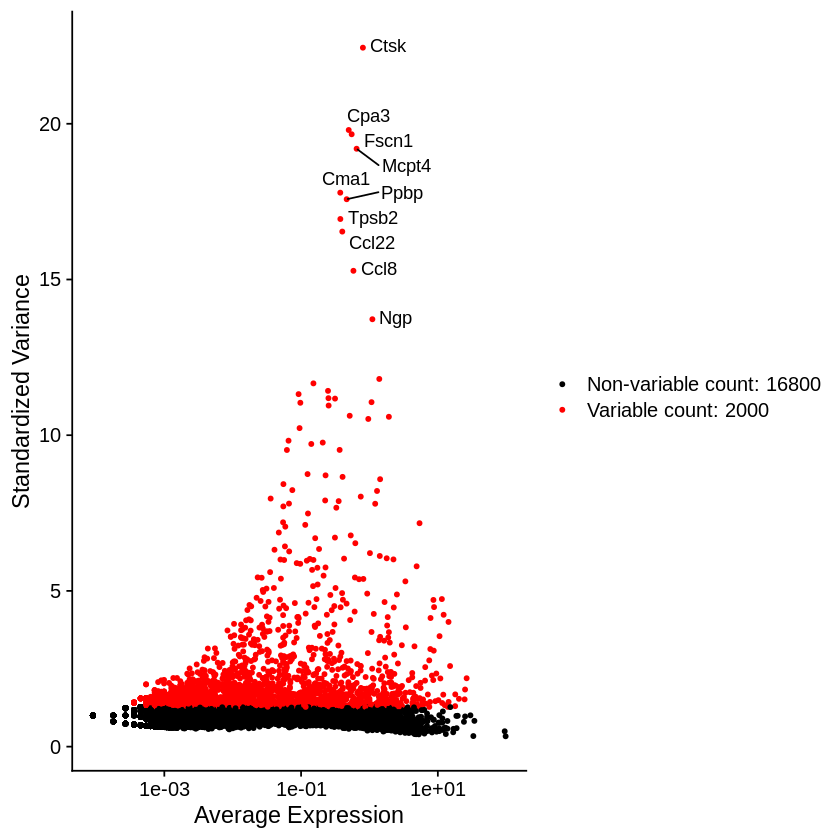

In [48]:
LabelPoints(plot = VariableFeaturePlot(d1d3.combind), 
            points = head(VariableFeatures(d1d3.combind), 10), 
            repel = TRUE)

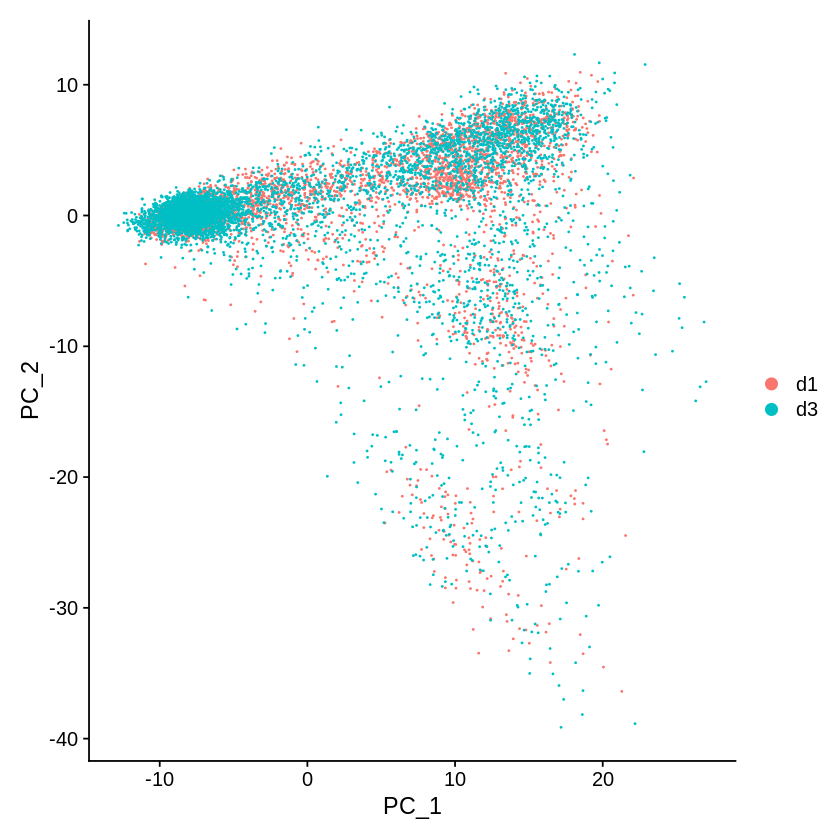

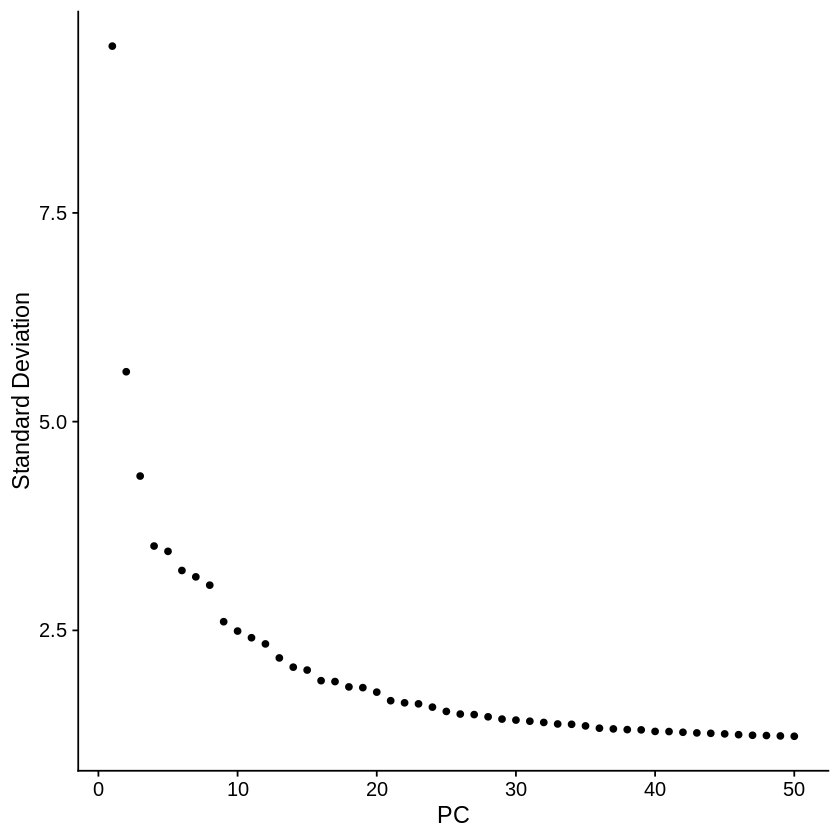

In [50]:
set.seed(12345)
DefaultAssay(mice_cca.merged.obj) <- "integrated" 
mice_cca.merged.obj <- ScaleData(mice_cca.merged.obj, verbose = FALSE)
mice_cca.merged.obj <- RunPCA(mice_cca.merged.obj, verbose = FALSE)
DimPlot(mice_cca.merged.obj, reduction = "pca")
ElbowPlot(mice_cca.merged.obj, ndims=50)



In [53]:
mice_cca.merged.obj <- FindNeighbors(mice_cca.merged.obj, reduction = "pca", dims = 1:15)
mice_cca.merged.obj <- FindClusters(mice_cca.merged.obj, resolution = 0.2)
mice_cca.merged.obj<- RunUMAP(mice_cca.merged.obj, reduction = "pca", dims = 1:15)
mice_cca.merged.obj <- RunTSNE(mice_cca.merged.obj, reduction = "pca", dims = 1:15)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11092
Number of edges: 412162

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9357
Number of communities: 9
Elapsed time: 1 seconds


11:53:33 UMAP embedding parameters a = 0.9922 b = 1.112

11:53:33 Read 11092 rows and found 15 numeric columns

11:53:33 Using Annoy for neighbor search, n_neighbors = 30

11:53:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:53:34 Writing NN index file to temp file /tmp/RtmpFBDGah/file150e03f686e30

11:53:34 Searching Annoy index using 1 thread, search_k = 3000

11:53:36 Annoy recall = 100%

11:53:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:53:39 Initializing from normalized Laplacian + noise (using irlba)

11:53:39 Commencing optimization for 200 epochs, with 486402 positive edges

11:53:43 Optimization finished



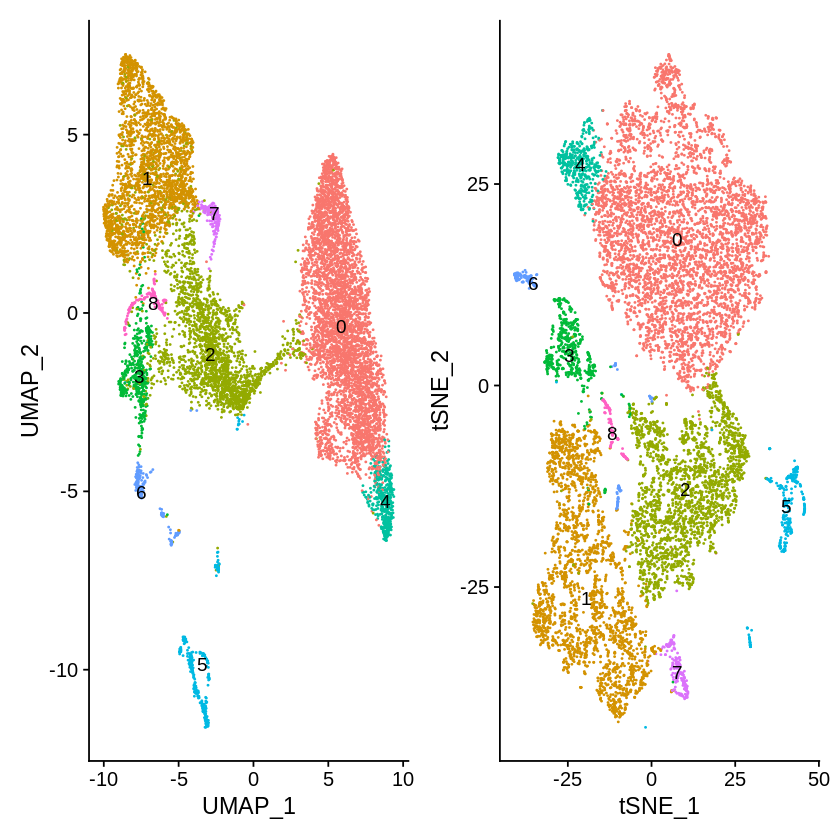

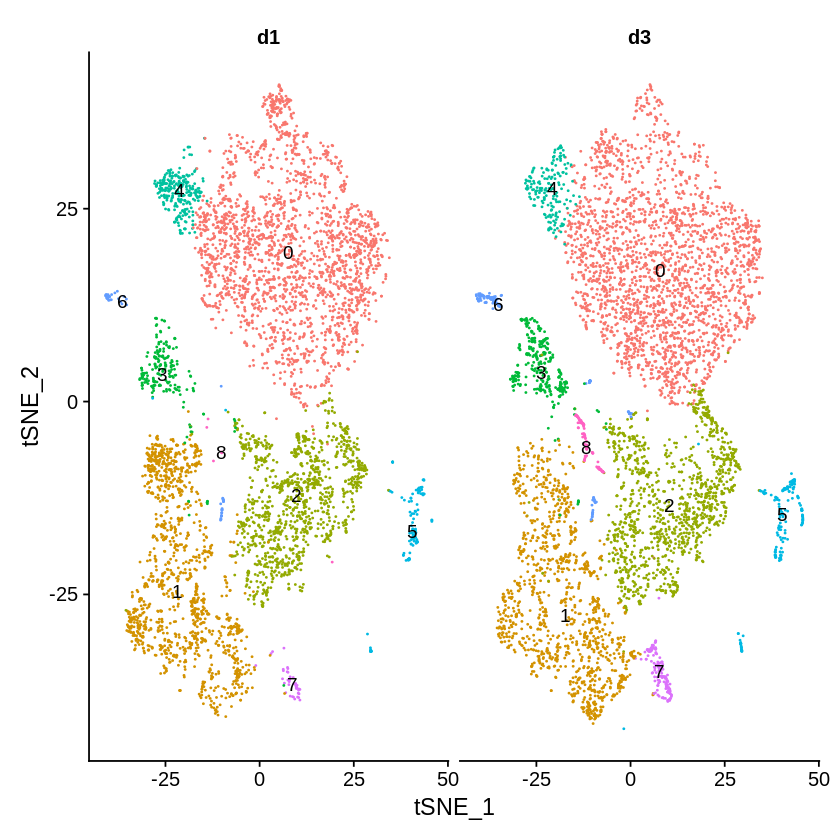

In [54]:
p1 <- DimPlot(mice_cca.merged.obj, reduction = "umap", label=T) + NoLegend()
p2 <- DimPlot(mice_cca.merged.obj, reduction = "tsne", label=T) + NoLegend()
p1+p2
p3 <- DimPlot(mice_cca.merged.obj, reduction = "tsne", label=T,  split.by = "orig.ident") + NoLegend()
p3

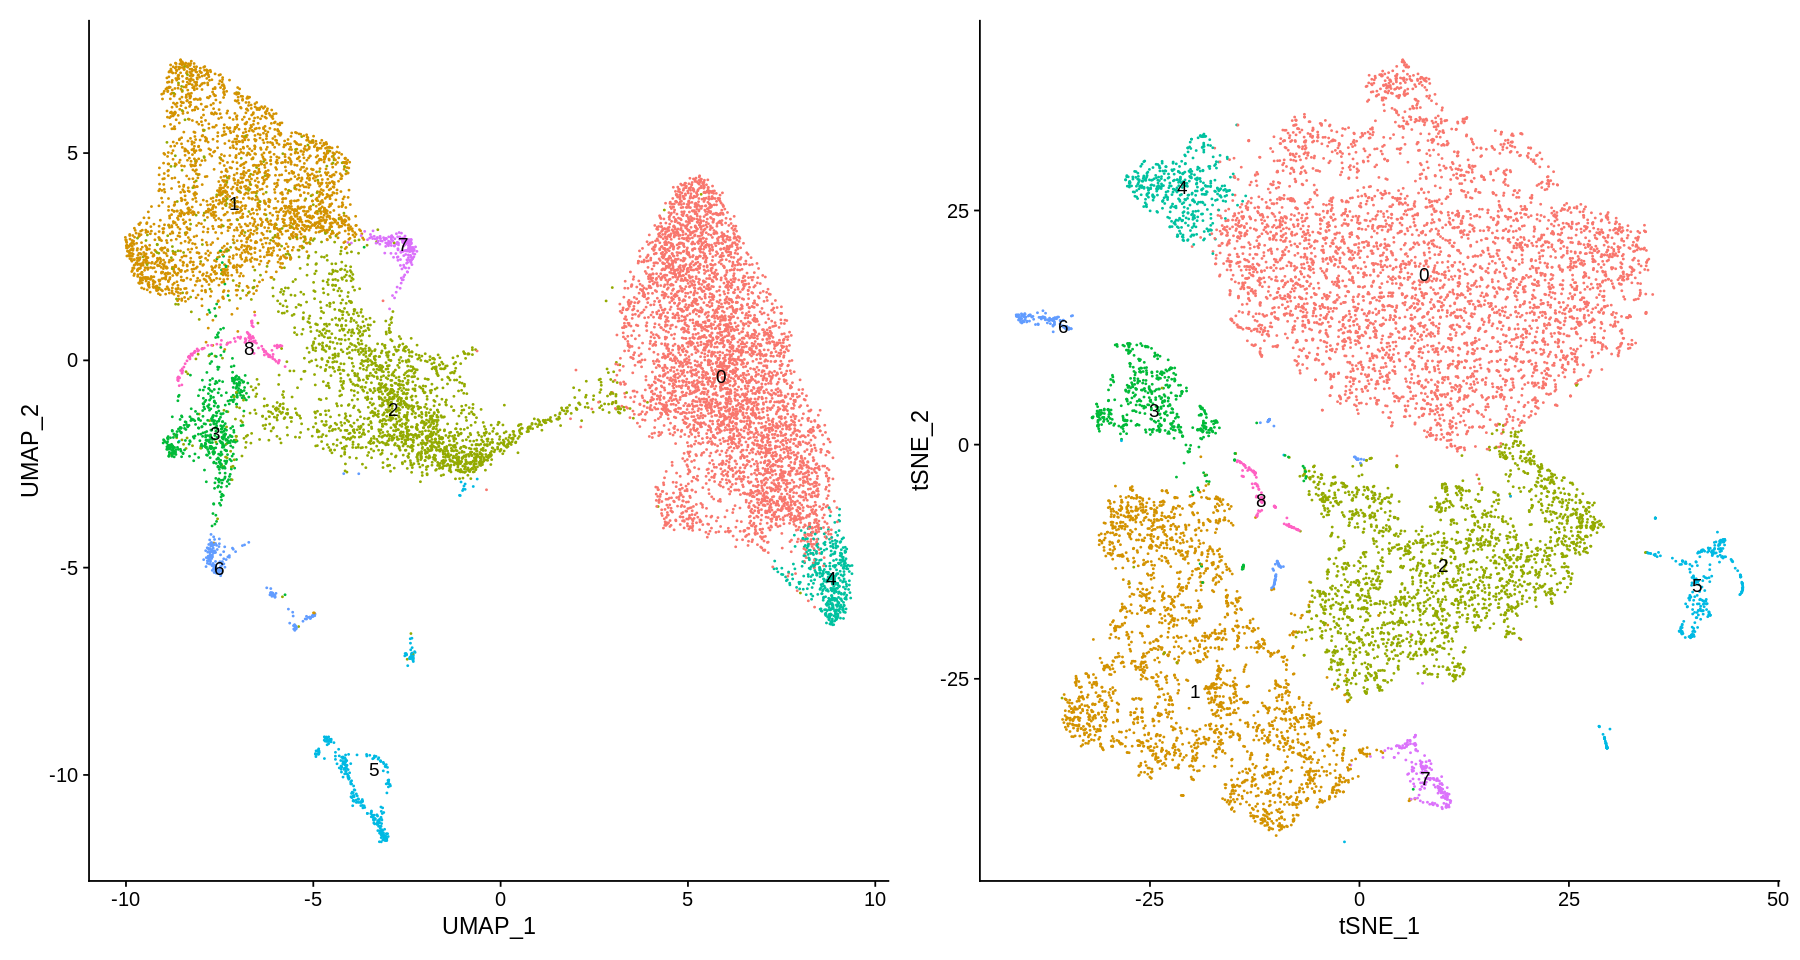

In [57]:
options(repr.plot.width = 15, repr.plot.height = 8)
p1+p2

In [66]:
if (!file.exists("/data2/ZenNa/mice_count_data/Result/")) {
  dir.create("/data2/ZenNa/mice_count_data/Result/")
}

In [67]:
ggsave("/data2/ZenNa/mice_count_data/Result/tsne_splitbySampleD1D3.png", p3,  width = 10, height = 5, units = "in")
ggsave("/data2/ZenNa/mice_count_data/Result/tsneD1D3.png", p2,  width = 5, height = 5, units = "in")

In [68]:
ggsave("/data2/ZenNa/mice_count_data/Result/UMAPD1D3.png", p1,  width = 5, height = 5, units = "in")

# Look at cluster IDs of the first 5 cells

In [70]:
head(mice_cca.merged.obj@meta.data)

orig.ident nCount_RNA nFeature_RNA sample integrated_snn_res.0.8
d1_C1 d1          4455      1189         NA     3                     
d1_C2 d1          3063       843         NA     0                     
d1_C3 d1         13068      2856         NA     4                     
d1_C4 d1          1931       603         NA     3                     
d1_C5 d1          4330      1382         NA     5                     
d1_C6 d1          6439      1905         NA     7                     
      seurat_clusters integrated_snn_res.0.2
d1_C1 0               0                     
d1_C2 0               0                     
d1_C3 1               1                     
d1_C4 0               0                     
d1_C5 1               1                     
d1_C6 3               3

In [71]:
table(mice_cca.merged.obj$seurat_clusters)



   0    1    2    3    4    5    6    7    8 
4619 2415 2275  509  449  323  195  187  120 

In [73]:
table(Idents(mice_cca.merged.obj))


   0    1    2    3    4    5    6    7    8 
4619 2415 2275  509  449  323  195  187  120 

In [76]:
install.packages('dplyr')
install.packages('limma')
install.packages('magrittr')


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘limma’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [77]:
library(limma)
library(dplyr)
library(magrittr)

In [78]:
logFCfilter=0.25
adjPvalfilter=0.05
cluster.markers <- FindAllMarkers(obj=mice_cca.merged.obj,
                                only.pos=FALSE,
                                min.pct=0.25,
                                logfc.thrshold=logFCfilter)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



In [90]:
install.packages("writexl")
library("writexl")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [88]:
library(openxlsx)

In [93]:
sig.markers <- cluster.markers[(abs(as.numeric(as.vector(cluster.markers$avg_log2FC))))>logFCfilter & as.numeric((as.vector(cluster.markers$p_val_adj))<adjPvalfilter),]


In [94]:
file_path_1 <- "/data2/ZenNa/mice_count_data/Result/cluster.marker.xlsx"


In [95]:
write_xlsx(sig.markers, path = file_path_1)

In [96]:
top10 <- cluster.markers %>% group_by(cluster) %>% top_n(n=10,wt=avg_log2FC)

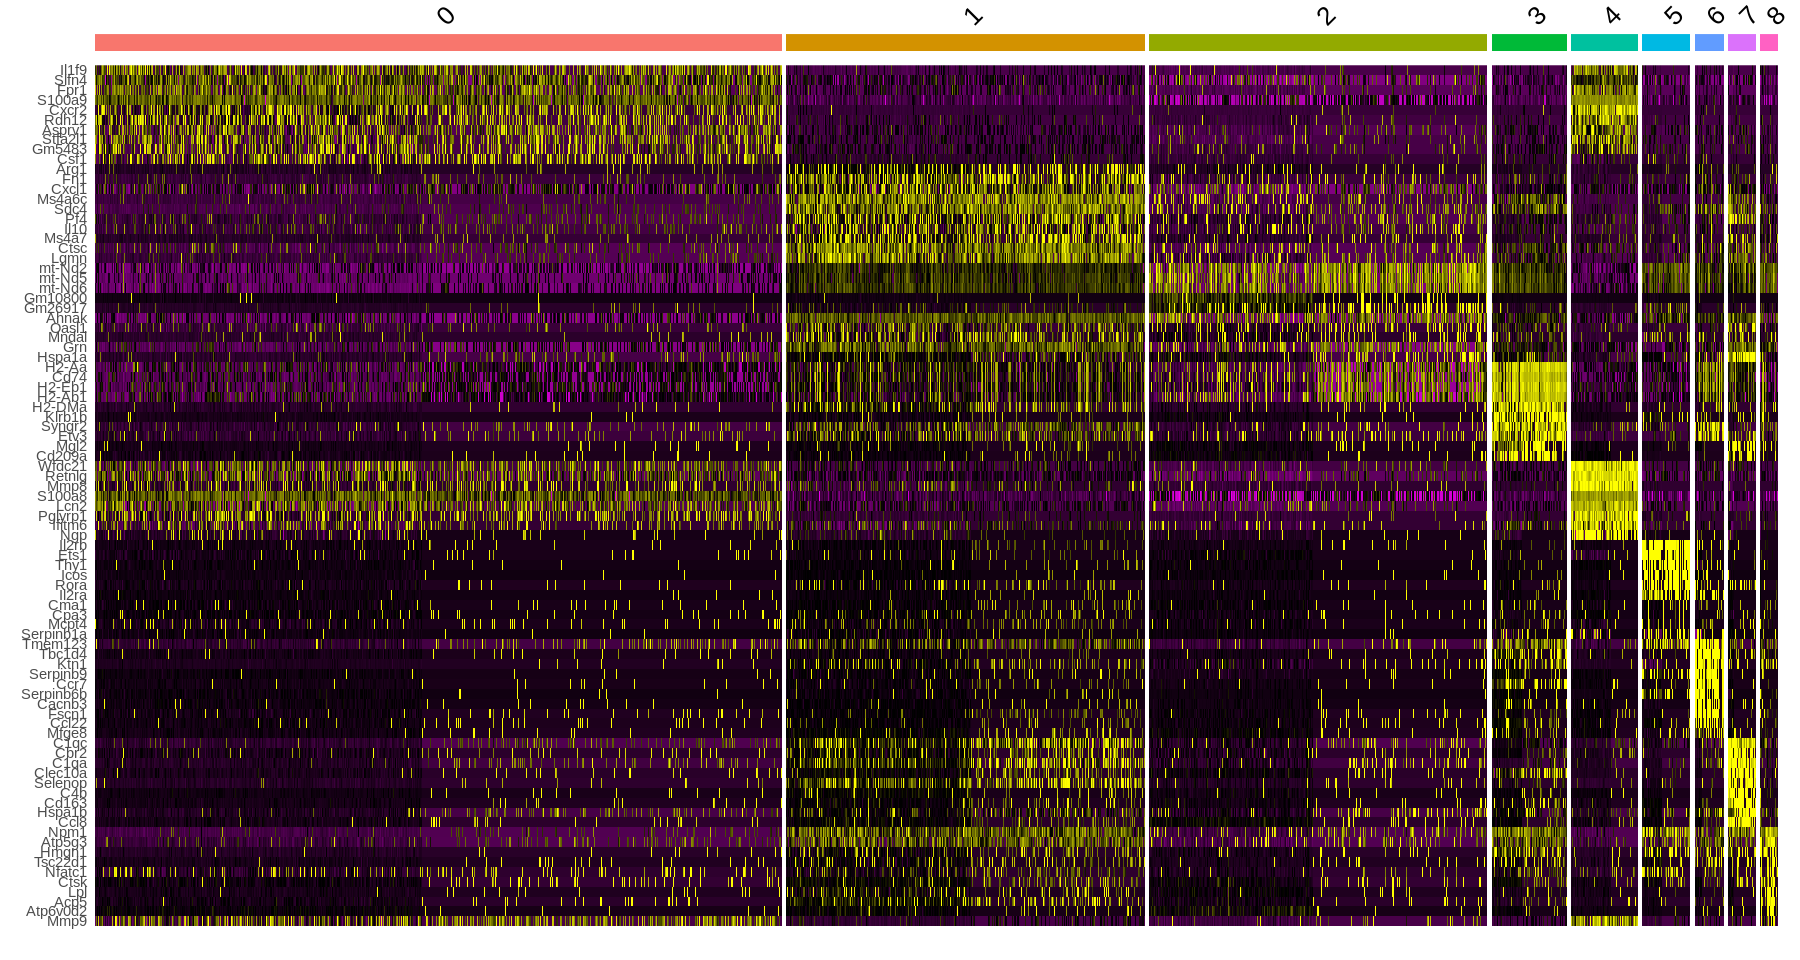

In [97]:
DoHeatmap(obj = mice_cca.merged.obj, features = top10$gene) + NoLegend()


In [98]:
p4 <- DoHeatmap(obj = mice_cca.merged.obj, features = top10$gene) + NoLegend()


In [102]:
ggsave("/data2/ZenNa/mice_count_data/Result/top10heatmap.png", p4,  width = 20, height = 15, units = "in")

In [105]:
write.csv(top10,file=("/data2/ZenNa/mice_count_data/Result/top10_D1D3.csv"))


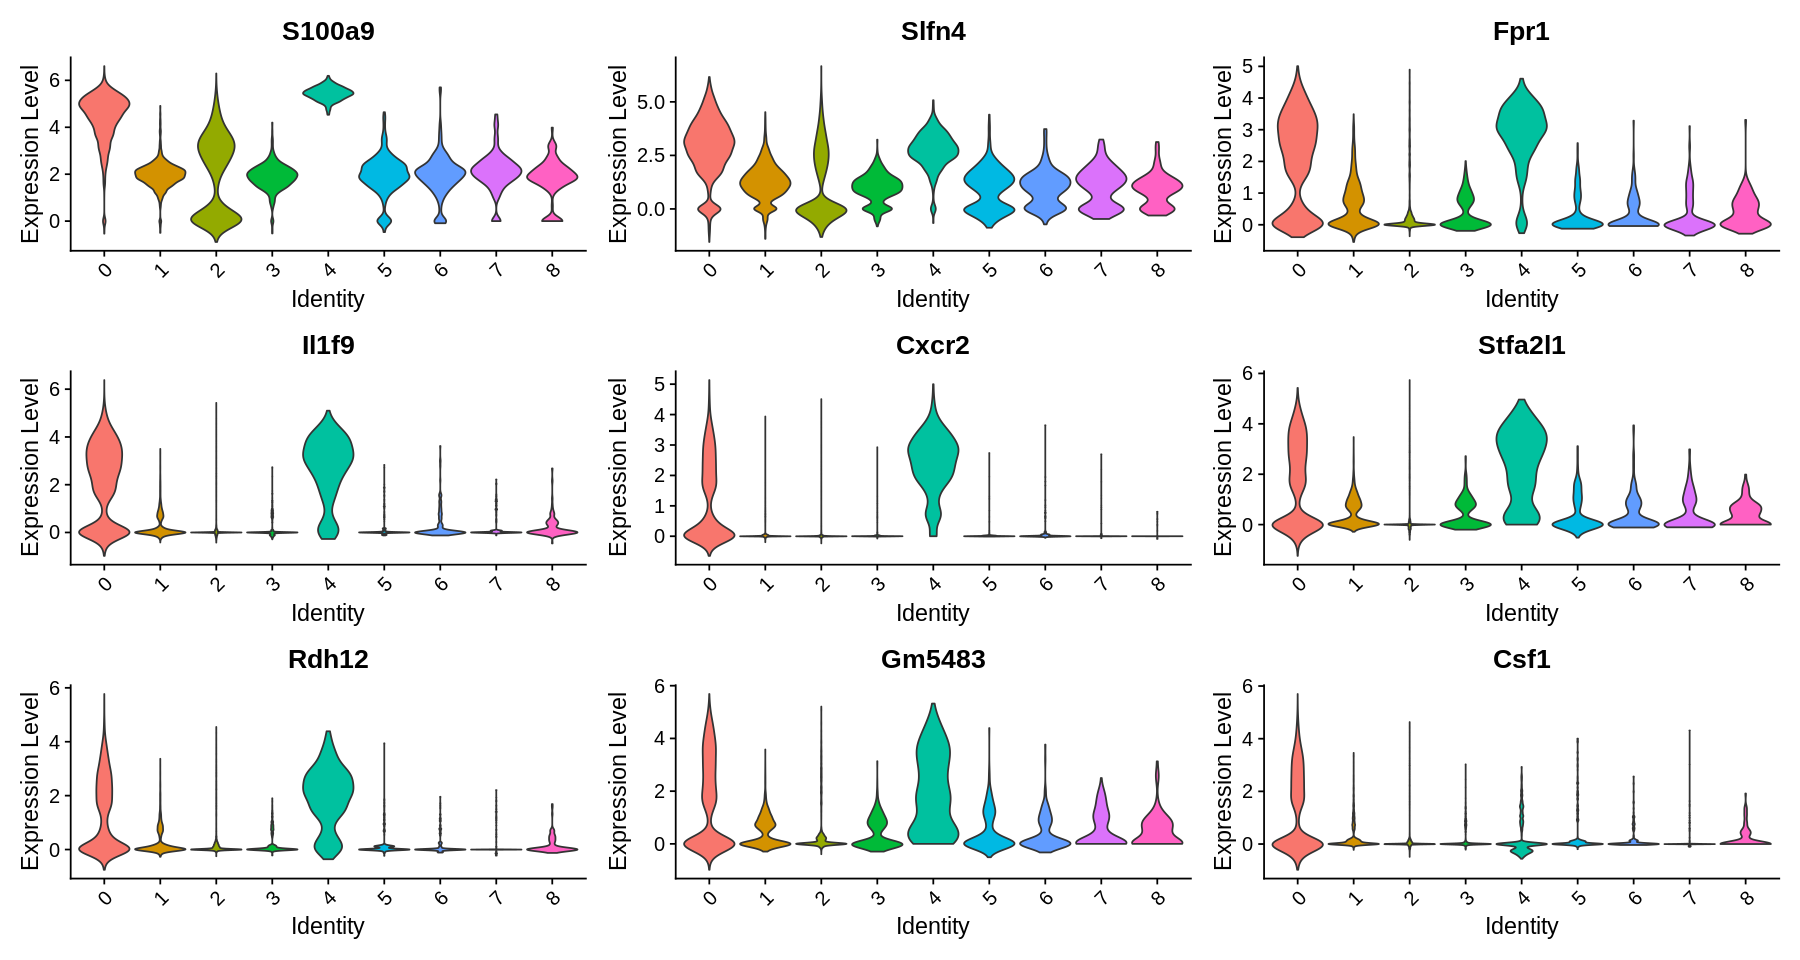

In [108]:
VlnPlot(obj = mice_cca.merged.obj, features = c("S100a9","Slfn4","Fpr1","Il1f9","Cxcr2","Stfa2l1","Rdh12","Gm5483","Csf1"),pt.size=0)


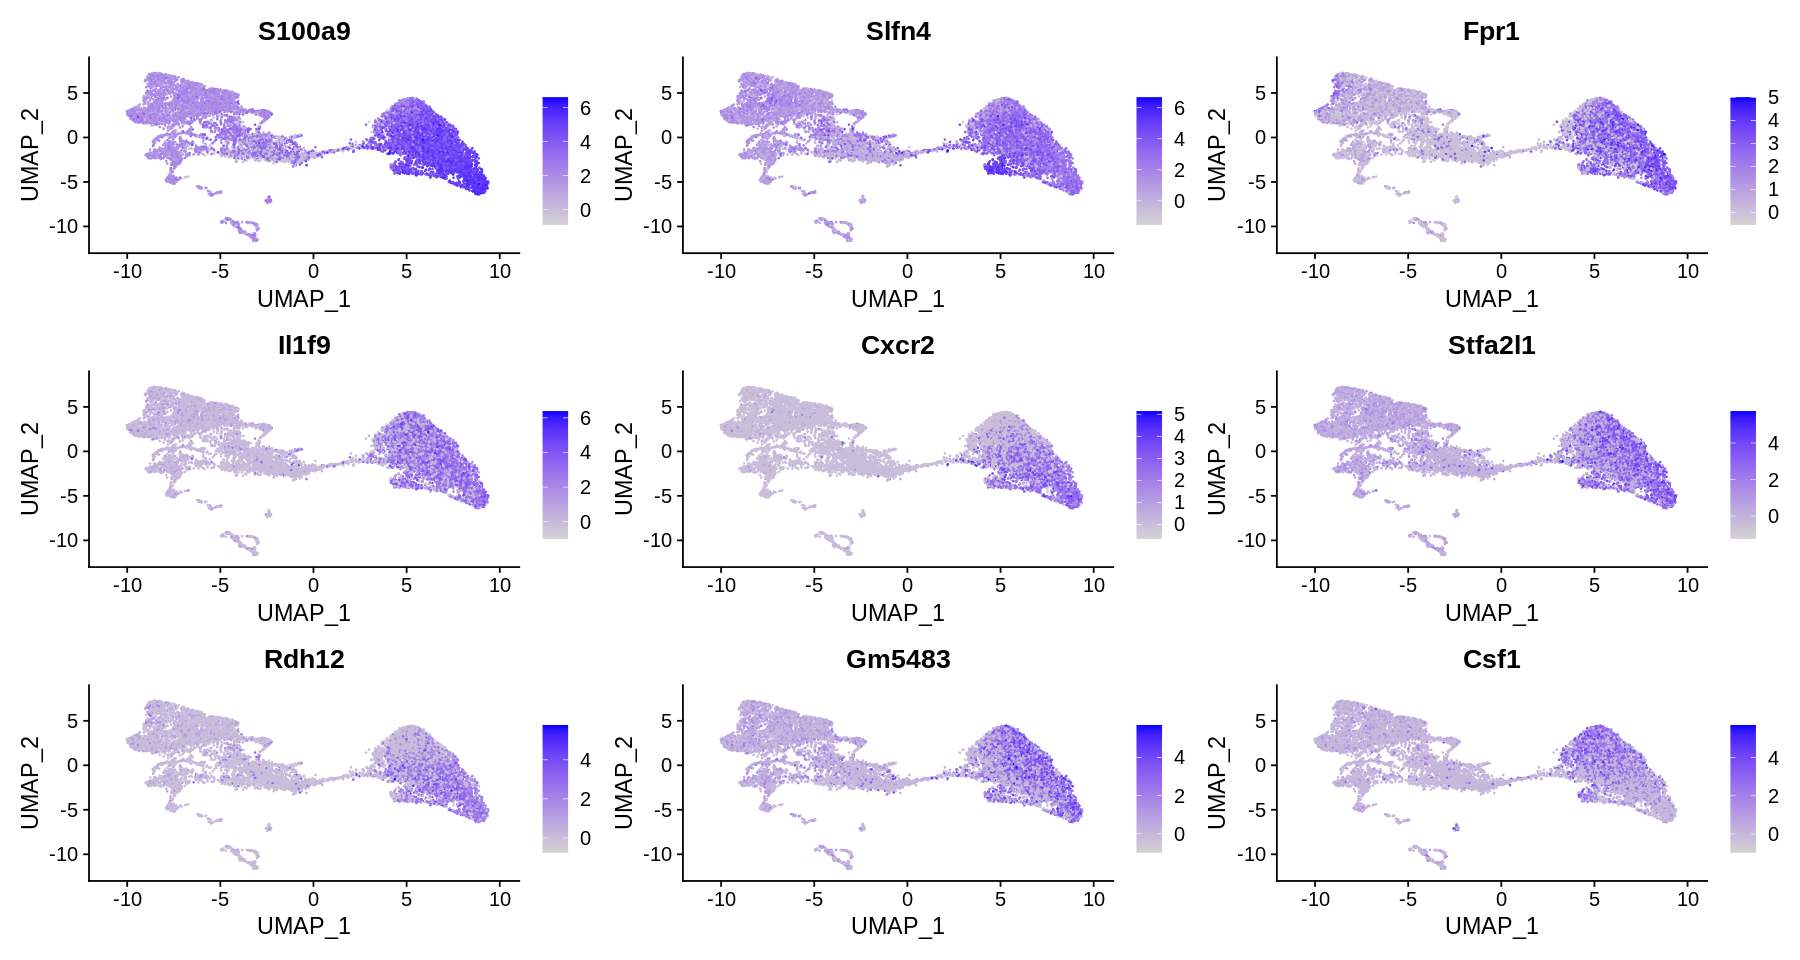

In [109]:
FeaturePlot(obj = mice_cca.merged.obj, features = c("S100a9","Slfn4","Fpr1","Il1f9","Cxcr2","Stfa2l1","Rdh12","Gm5483","Csf1"),pt.size=0.1)


In [110]:
pdf(file="cluster0markerBubble.pdf",width=20,height=6)


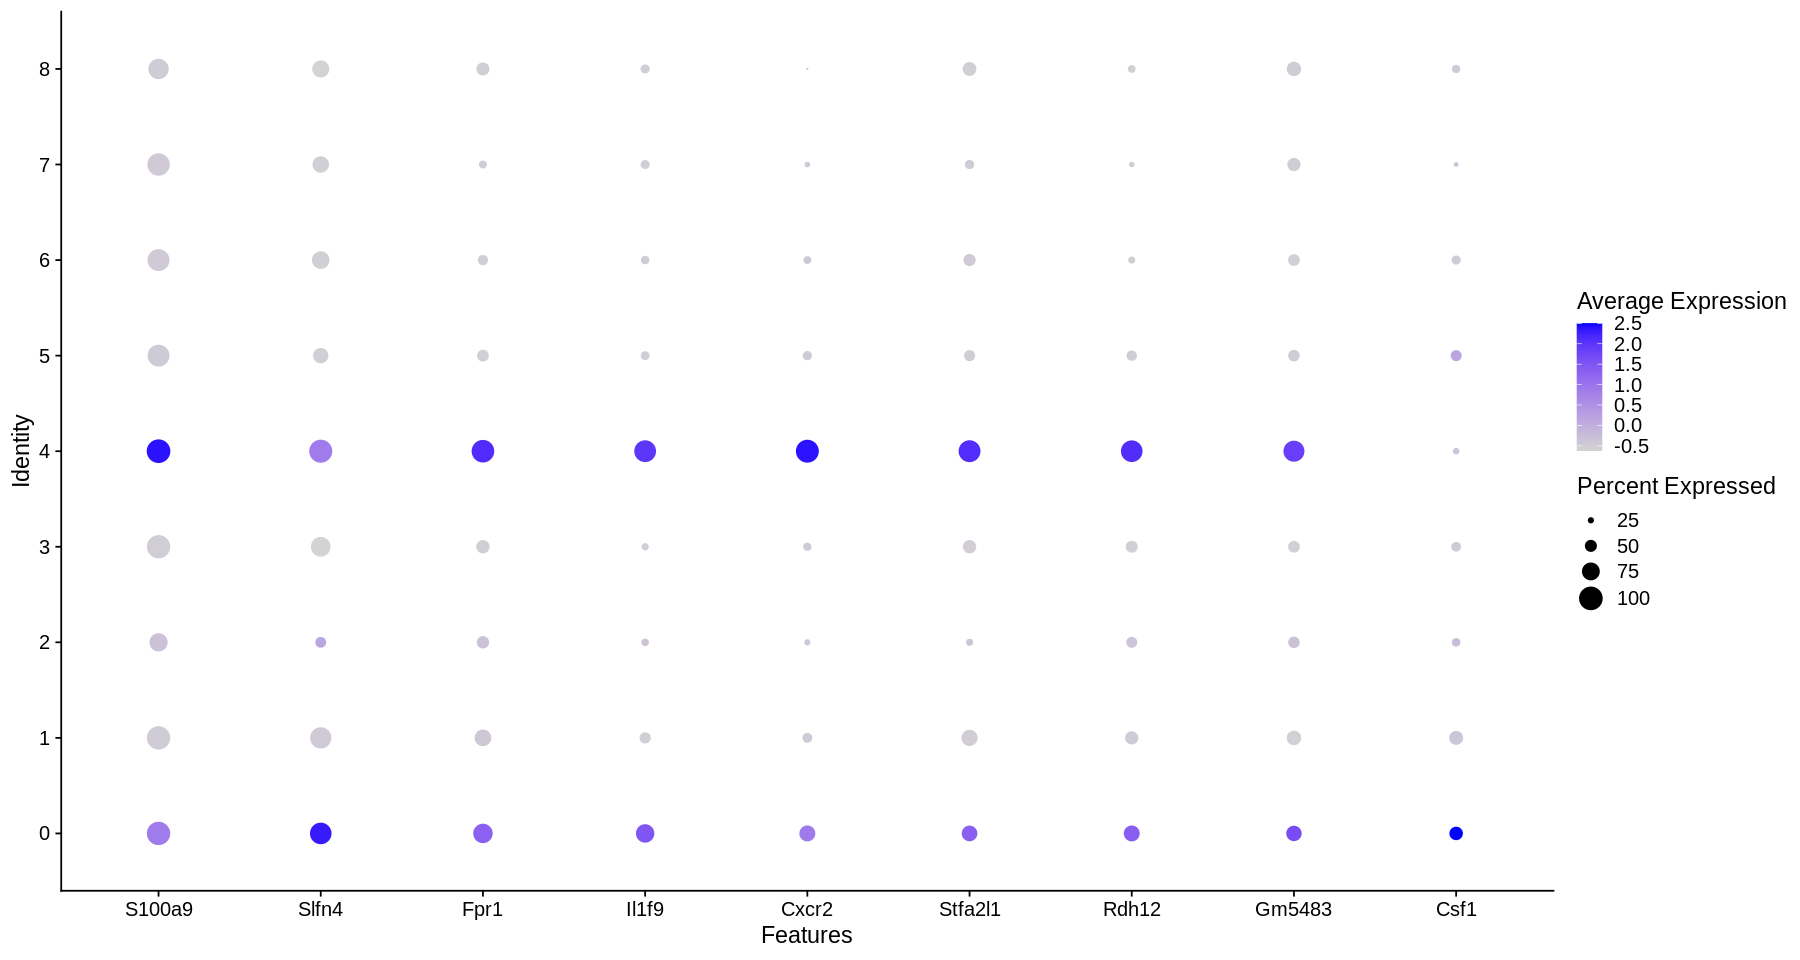

In [111]:
cluster0Markert= c("S100a9","Slfn4","Fpr1","Il1f9","Cxcr2","Stfa2l1","Rdh12","Gm5483","Csf1")
DotPlot(obj = mice_cca.merged.obj,features = cluster0Markert )

In [115]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("celldex")

Bioconductor version '3.16' is out-of-date; the current release version '3.17'
  is available with R version '4.3'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.22), R 4.2.3 (2023-03-15)

Installing package(s) 'celldex'

also installing the dependencies ‘zlibbioc’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘filelock’, ‘plogr’, ‘Biostrings’, ‘MatrixGenerics’, ‘GenomicRanges’, ‘IRanges’, ‘GenomeInfoDb’, ‘BiocFileCache’, ‘RSQLite’, ‘interactiveDisplayBase’, ‘KEGGREST’, ‘sparseMatrixStats’, ‘SummarizedExperiment’, ‘ExperimentHub’, ‘AnnotationHub’, ‘AnnotationDbi’, ‘S4Vectors’, ‘DelayedArray’, ‘DelayedMatrixStats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'harmony', 'knitr', 'Matrix', 'pkgload', 'RcppArmadillo'

In [116]:
BiocManager::install("BiocParallel")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.22), R 4.2.3 (2023-03-15)

Installing package(s) 'BiocParallel'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘snow’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'harmony', 'knitr', 'Matrix', 'pkgload', 'RcppArmadillo',
  'reticulate', 'rmarkdown', 'sctransform', 'spatstat.random'



In [117]:
BiocManager::install("SingleR")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.22), R 4.2.3 (2023-03-15)

Installing package(s) 'SingleR'

also installing the dependencies ‘ScaledMatrix’, ‘rsvd’, ‘RcppHNSW’, ‘BiocSingular’, ‘beachmat’, ‘BiocNeighbors’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'harmony', 'knitr', 'Matrix', 'pkgload', 'RcppArmadillo',
  'reticulate', 'rmarkdown', 'sctransform', 'spatstat.random'



In [118]:
library(celldex)
immgen <-ImmGenData()
library(SingleR)
library(BiocParallel)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, 

In [119]:
pred.cca.merged.obj <- SingleR(test = mice_cca.merged.obj@assays$RNA@data,ref = immgen,labels = immgen$label.fine,clusters = mice_cca.merged.obj@active.ident,fine.tune = TRUE,BPPARAM = SnowParam(40) )
pred.cca.merged.obj$pruned.labels

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames =

[1] "Neutrophils (GN.Thio)"        "Monocytes (MO.6C+II-)"       
[3] "Monocytes (MO)"               "DC (DC.103-11B+24+)"         
[5] "Neutrophils (GN.ARTH)"        "Macrophages (MF.SBCAPS)"     
[7] "DC (DC.103-11B+24+)"          "Macrophages (MF.11C-11B+)"   
[9] "Macrophages (MF.103-11B+24-)"

In [120]:
pdf(file="celllablemicedata",width=10,height=10)


In [122]:
install.packages("viridis")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [123]:
library(viridis)

Loading required package: viridisLite



In [125]:
install.packages("pheatmap")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [126]:
library(pheatmap)


Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


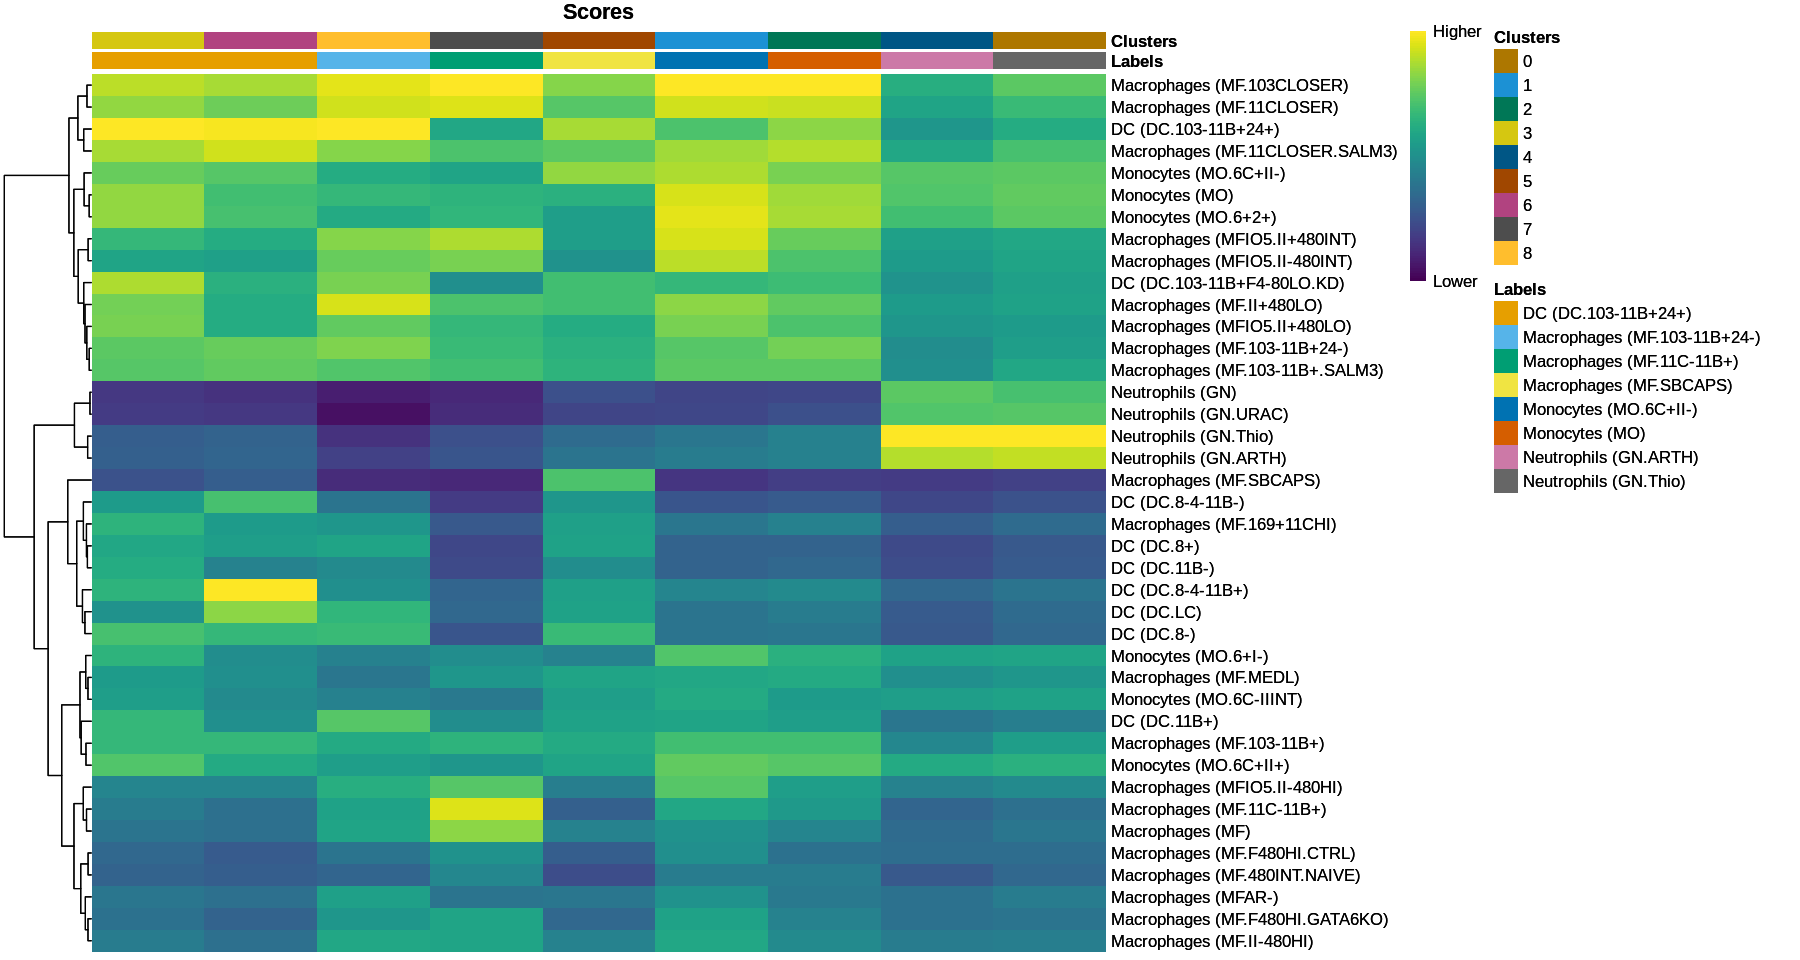

In [127]:
plotScoreHeatmap(pred.cca.merged.obj,clusters = pred.cca.merged.obj@rownames,fontsize.row=9,show_colnames = F )


In [128]:
il1 <- subset(cluster.markers,p_val=0)


In [129]:
il1

p_val       avg_log2FC pct.1 pct.2 p_val_adj cluster gene     
Il1f9     0            2.5531662 0.776 0.413 0         0       Il1f9    
Slfn4     0            2.1772062 0.911 0.711 0         0       Slfn4    
Fpr1      0            2.0410412 0.820 0.609 0         0       Fpr1     
S100a9    0            2.0089608 0.988 0.902 0         0       S100a9   
Cxcr2     0            1.8570594 0.670 0.368 0         0       Cxcr2    
S100a8    0            1.7108757 0.992 0.914 0         0       S100a8   
Ifitm1    0            1.4798709 0.909 0.803 0         0       Ifitm1   
Srpk1     0           -0.4195641 0.205 0.470 0         0       Srpk1    
Xcr1      0           -0.4207668 0.234 0.484 0         0       Xcr1     
Nop58     0           -0.8635814 0.309 0.577 0         0       Nop58    
Mdh1      0           -0.8653259 0.407 0.637 0         0       Mdh1     
Adgre1    0           -1.0676829 0.430 0.665 0         0       Adgre1   
Eef1g     0           -1.1593428 0.439 0.687 0         0       Eef1g    
Kcnn4     0           -1.2065575 0.436 0.658 0         0       Kcnn4    
Nrp2      0           -1.2512163 0.380 0.629 0         0       Nrp2     
Eef1a1    0           -1.2555950 0.939 0.940 0         0       Eef1a1   
Tubb5     0           -1.2633924 0.475 0.704 0         0       Tubb5    
Got1      0           -1.2645395 0.381 0.636 0         0       Got1     
Ptms      0           -1.2835111 0.565 0.796 0         0       Ptms     
Tagln2    0           -1.3086649 0.699 0.851 0         0       Tagln2   
Myo5a     0           -1.3246732 0.398 0.647 0         0       Myo5a    
Ybx3      0           -1.3506227 0.288 0.629 0         0       Ybx3     
Pdia3     0           -1.3611098 0.388 0.701 0         0       Pdia3    
Lgals3    0           -1.3681668 0.860 0.910 0         0       Lgals3   
Rps3      0           -1.3702390 0.755 0.864 0         0       Rps3     
Ncl       0           -1.3706436 0.597 0.831 0         0       Ncl      
Rps12     0           -1.3716282 0.834 0.895 0         0       Rps12    
Ms4a6b    0           -1.3781923 0.338 0.600 0         0       Ms4a6b   
Glul      0           -1.3842652 0.613 0.798 0         0       Glul     
Flrt3     0           -1.3971104 0.344 0.606 0         0       Flrt3    
⋮         ⋮           ⋮          ⋮     ⋮     ⋮         ⋮       ⋮        
Pdpn.4    0.001896079 -0.6711134 0.533 0.425 1         8       Pdpn     
Nupr1.3   0.001984078 -0.2728709 0.200 0.257 1         8       Nupr1    
Lyz1.4    0.002184864 -0.5264698 0.233 0.478 1         8       Lyz1     
Tgfbi.6   0.002357281  0.3022121 0.808 0.716 1         8       Tgfbi    
Pou2f2.3  0.002520334 -0.3342094 0.058 0.318 1         8       Pou2f2   
Slc16a1.3 0.002541108  0.3257075 0.308 0.307 1         8       Slc16a1  
Prnp.7    0.002670144 -0.4557385 0.333 0.562 1         8       Prnp     
F10.6     0.002750448 -1.7780432 0.333 0.504 1         8       F10      
Ccnb1     0.002796798  0.2857558 0.258 0.212 1         8       Ccnb1    
Mgl2.6    0.003269150  0.7163862 0.267 0.525 1         8       Mgl2     
Ncaph     0.003425924  0.3247319 0.275 0.226 1         8       Ncaph    
Myo1b     0.003452228  0.5691898 0.308 0.260 1         8       Myo1b    
Msr1.6    0.003487596 -0.6864113 0.483 0.375 1         8       Msr1     
Ptger4.6  0.003547218 -0.3934990 0.158 0.407 1         8       Ptger4   
Gpx3.2    0.003577672  0.3864960 0.158 0.389 1         8       Gpx3     
Slc29a1.2 0.003995934  0.4482437 0.442 0.468 1         8       Slc29a1  
Ctsd.4    0.004872101 -0.6766489 0.717 0.792 1         8       Ctsd     
Thy1.6    0.005310051 -0.2597198 0.192 0.411 1         8       Thy1     
Cd1d1     0.005566089  0.3277400 0.108 0.287 1         8       Cd1d1    
Slc7a8.5  0.005941350 -0.4438148 0.358 0.343 1         8       Slc7a8   
Ccr7.6    0.006096967 -0.3707770 0.200 0.430 1         8       Ccr7     
Axl.2     0.006147358  0.4880415 0.367 0.365 1         8       Axl      
Fn1.4     0.006264236 -0.3707375 0.600 0.538 1         8       Fn1  

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


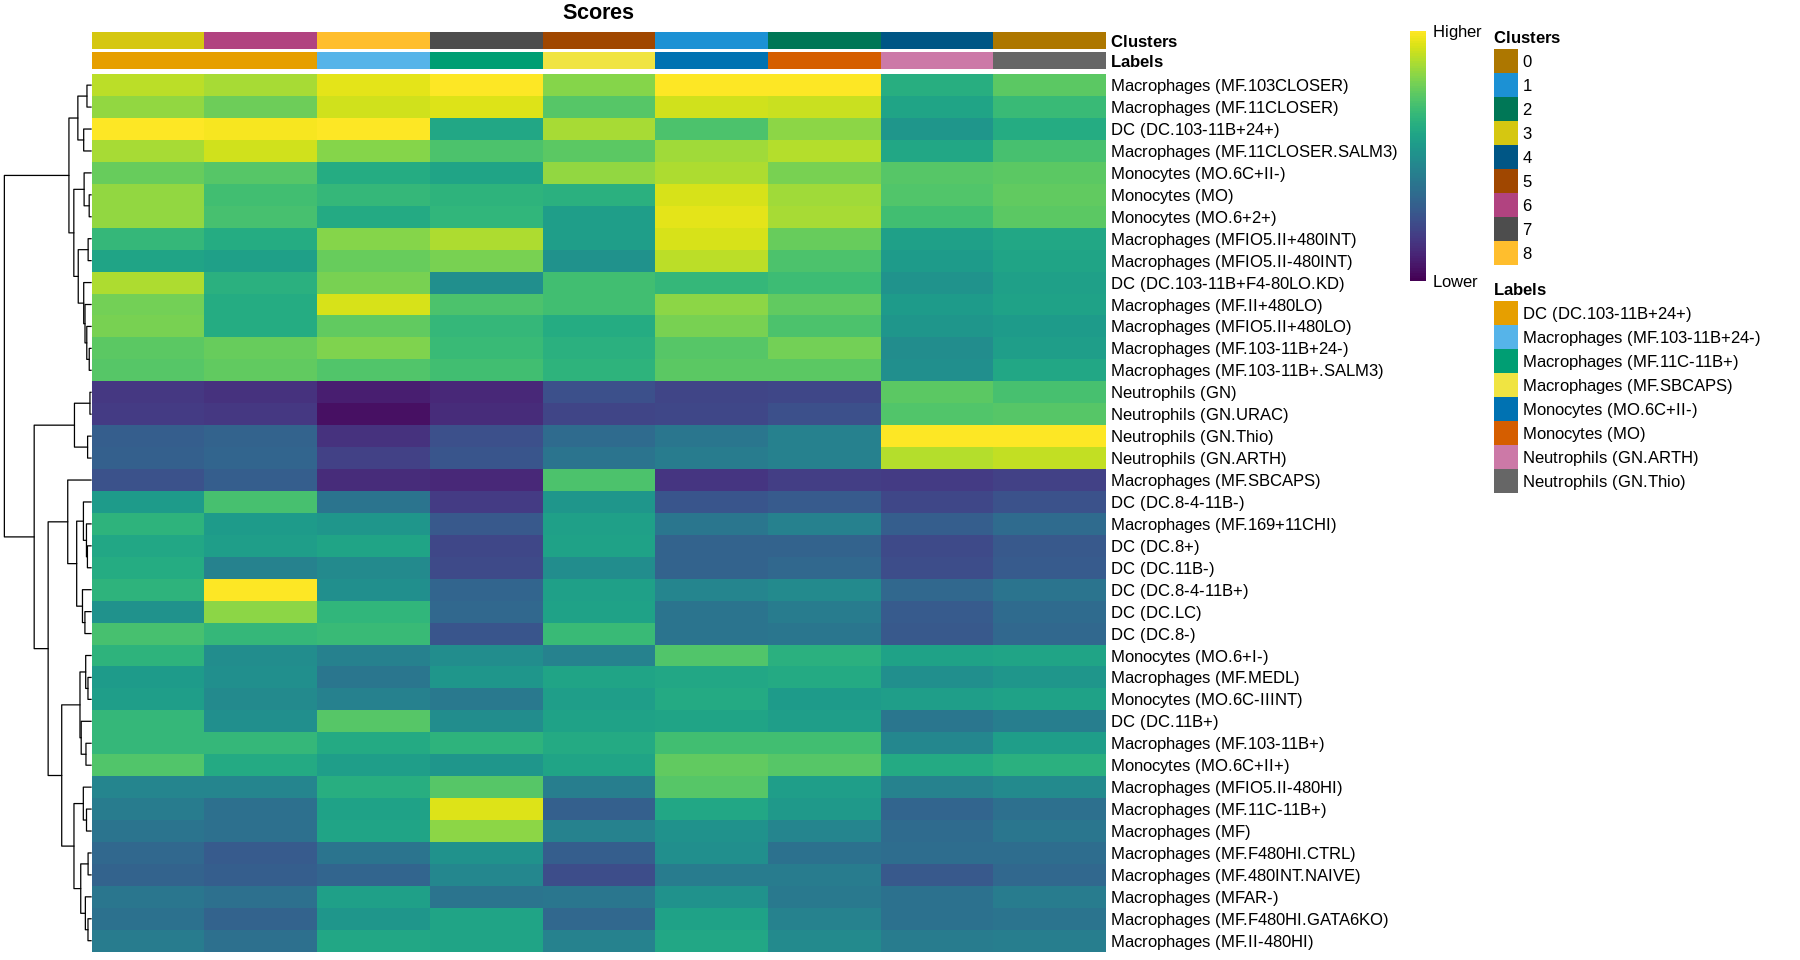

In [130]:
p5 <- plotScoreHeatmap(pred.cca.merged.obj,clusters = pred.cca.merged.obj@rownames,fontsize.row=9,show_colnames = F )


In [131]:
ggsave("/data2/ZenNa/mice_count_data/Result/predictclusterD1D3.png", p5,  width = 20, height = 15, units = "in")